In [1]:
#Wisconsin Breast Cancer dataset

import io
import pandas as pd
dataset = pd.read_csv(r"C:\Users\eklas\OneDrive\Desktop\CSV\AI_ML\wisconsin_breast.csv")
                 #header=None, encoding='utf-8')
pd.set_option('display.max_rows', 13)
dataset.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [2]:
#can dro the 'id' col
dataset.drop(['id'], inplace = True, axis = 1)

# reanme some cols
dataset=dataset.rename(columns={'concave points_mean':'concave_points_mean', 
                                'concave points_worst':'concave_points_worst', 'concave points_se':'concave_points_se'})

In [38]:
from sklearn.preprocessing import LabelBinarizer 
diagnosis = dataset['diagnosis']
encoder = LabelBinarizer()
diagnosis_1hot=encoder.fit_transform(diagnosis)
# diagnosis_1hot
diagnosis=diagnosis_1hot

In [3]:
# find nulls

nulls = dataset.isnull().sum()
nulls = nulls.sum()
# no nulls, 31 cols, great
print('\nThere are', dataset.shape[0],'rows in the dataset')
print('There are', dataset.shape[1],'columns (features) in the dataset')
print('There are {}'.format(nulls),'nulls in the dataset')


There are 569 rows in the dataset
There are 31 columns (features) in the dataset
There are 0 nulls in the dataset


In [4]:
# Percentage of cancer and no breast cancer participants

count_no_cancer = len(dataset[dataset['diagnosis']==0])
count_cancer = len(dataset[dataset['diagnosis']==1])
pct_no_cancer = count_no_cancer/(count_no_cancer+count_cancer)*100
pct_of_cancer = count_cancer/(count_no_cancer+count_cancer)*100

print("No Breast Cancer: {:.1f}".format(pct_no_cancer), '%')
print("Breast Cancer: {:.1f}".format(pct_of_cancer), '%')

No Breast Cancer: 62.7 %
Breast Cancer: 37.3 %


In [3]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

# Load the dataset
diagnosis = dataset['diagnosis']
features = dataset.drop('diagnosis', axis = 1)
    
# Success
print("Wisconsis Breast Cancer dataset has {} data points with {} variables each.".format(*dataset.shape))

Wisconsis Breast Cancer dataset has 569 data points with 31 variables each.


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
#Loading the dataset
array = dataset.values
X = dataset.drop('diagnosis', axis=1)
y = dataset['diagnosis']

In [7]:
# 31 is quite a lot of features, I will cut this down to 20 or so.
# using Wrapper method for feature selection, then I will cross-reference with Feature Importance and Lasso.

#Adding constant column of ones, mandatory for sm.OLS model

X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

C:\Users\eklas\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                      0.000003
radius_mean                0.209985
texture_mean               0.567426
perimeter_mean             0.344641
area_mean                  0.545391
                             ...   
compactness_worst          0.860902
concavity_worst            0.156453
concave_points_worst       0.611751
symmetry_worst             0.260493
fractal_dimension_worst    0.071517
Length: 31, dtype: float64

In [5]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X, y)

pd.set_option('display.max_rows', 30) #expand the cols to see all cols
pd.DataFrame({'Columns':X.columns, 'Importance':dt.feature_importances_}).sort_values(by='Importance', ascending=False)

# for DecisionTreeClassifier, these are my most important features. I will choose the top 15. 

,Columns,Importance
20,radius_worst,0.695594
27,concave_points_worst,0.138938
21,texture_worst,0.088561
24,smoothness_worst,0.014405
1,texture_mean,0.012083
23,area_worst,0.011086
7,concave_points_mean,0.008771
26,concavity_worst,0.008727
18,symmetry_se,0.007316
5,compactness_mean,0.005831


In [9]:
#Backward Elimination for feature selection (befs)
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max) # if p-vals are < .05, they are not significant predictors of my DV, so remove them.
    else:
        break
selected_features_BE = cols
print(selected_features_BE) # final set of cols to use

C:\Users\eklas\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


['radius_mean', 'compactness_mean', 'concave_points_mean', 'radius_se', 'smoothness_se', 'concavity_se', 'concave_points_se', 'radius_worst', 'texture_worst', 'area_worst', 'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [6]:
# dataset backwards elimination feature selection, lasso, feature importance

dataset_befs=dataset[['diagnosis','radius_mean', 'compactness_mean', 'concave_points_mean', 'radius_se', 'smoothness_se', 
            'concavity_se', 'concave_points_se', 'radius_worst', 'area_se', 'compactness_se', 'area_mean', 
              'concave_points_worst','texture_worst', 'area_worst', 'concavity_worst', 'symmetry_worst', 
              'fractal_dimension_worst', 'smoothness_worst', 'perimeter_worst']]

In [11]:
# Feature Selection to choose the most important variables in my dataset. 30+ features
# is quite a lot and there's likely some multicolinnearity happening. I will choose the top
# 20 features, based on the results of these methods. 

# embedded method

X_fs = dataset.drop('diagnosis', axis=1)
y_fs = dataset['diagnosis']

reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.201830
Best score using built-in LassoCV: 0.661795


In [12]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
# yikes, 4 variables selected is pretty harsh. I will retain more than that to avoid underfitting.

Lasso picked 4 variables and eliminated the other 26 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

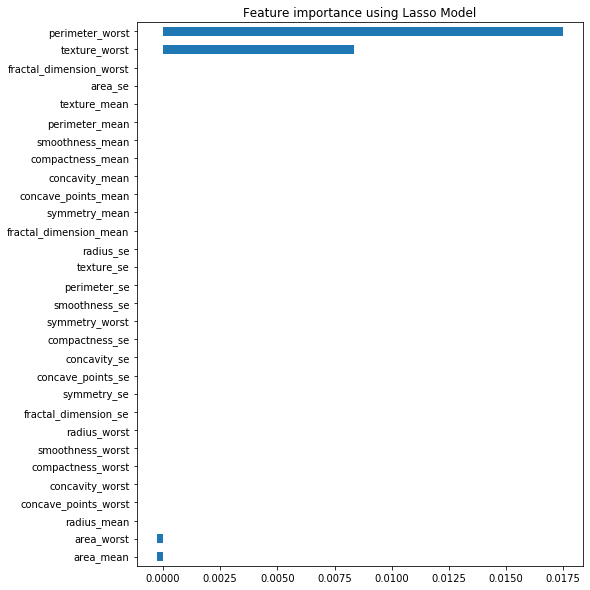

In [13]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

# From the entire dataset, Lasso chose perimeter_worst, texture_worst, area_worst, and area_mean.

In [14]:
# can see the means of individual features, grouped by diagnosis
dataset_befs.groupby('diagnosis').mean()

,radius_mean,compactness_mean,concave_points_mean,radius_se,smoothness_se,concavity_se,concave_points_se,radius_worst,area_se,compactness_se,area_mean,concave_points_worst,texture_worst,area_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,smoothness_worst,perimeter_worst
diagnosis,,,,,,,,,,,,,,,,,,,
0,12.146524,0.080085,0.025717,0.284082,0.007196,0.025997,0.009858,13.379801,21.135148,0.021438,462.790196,0.074444,23.515070,558.899440,0.166238,0.270246,0.079442,0.124959,87.005938
1,17.462830,0.145188,0.087990,0.609083,0.006780,0.041824,0.015060,21.134811,72.672406,0.032281,978.376415,0.182237,29.318208,1422.286321,0.450606,0.323468,0.091530,0.144845,141.370330


C:\Users\eklas\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\eklas\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


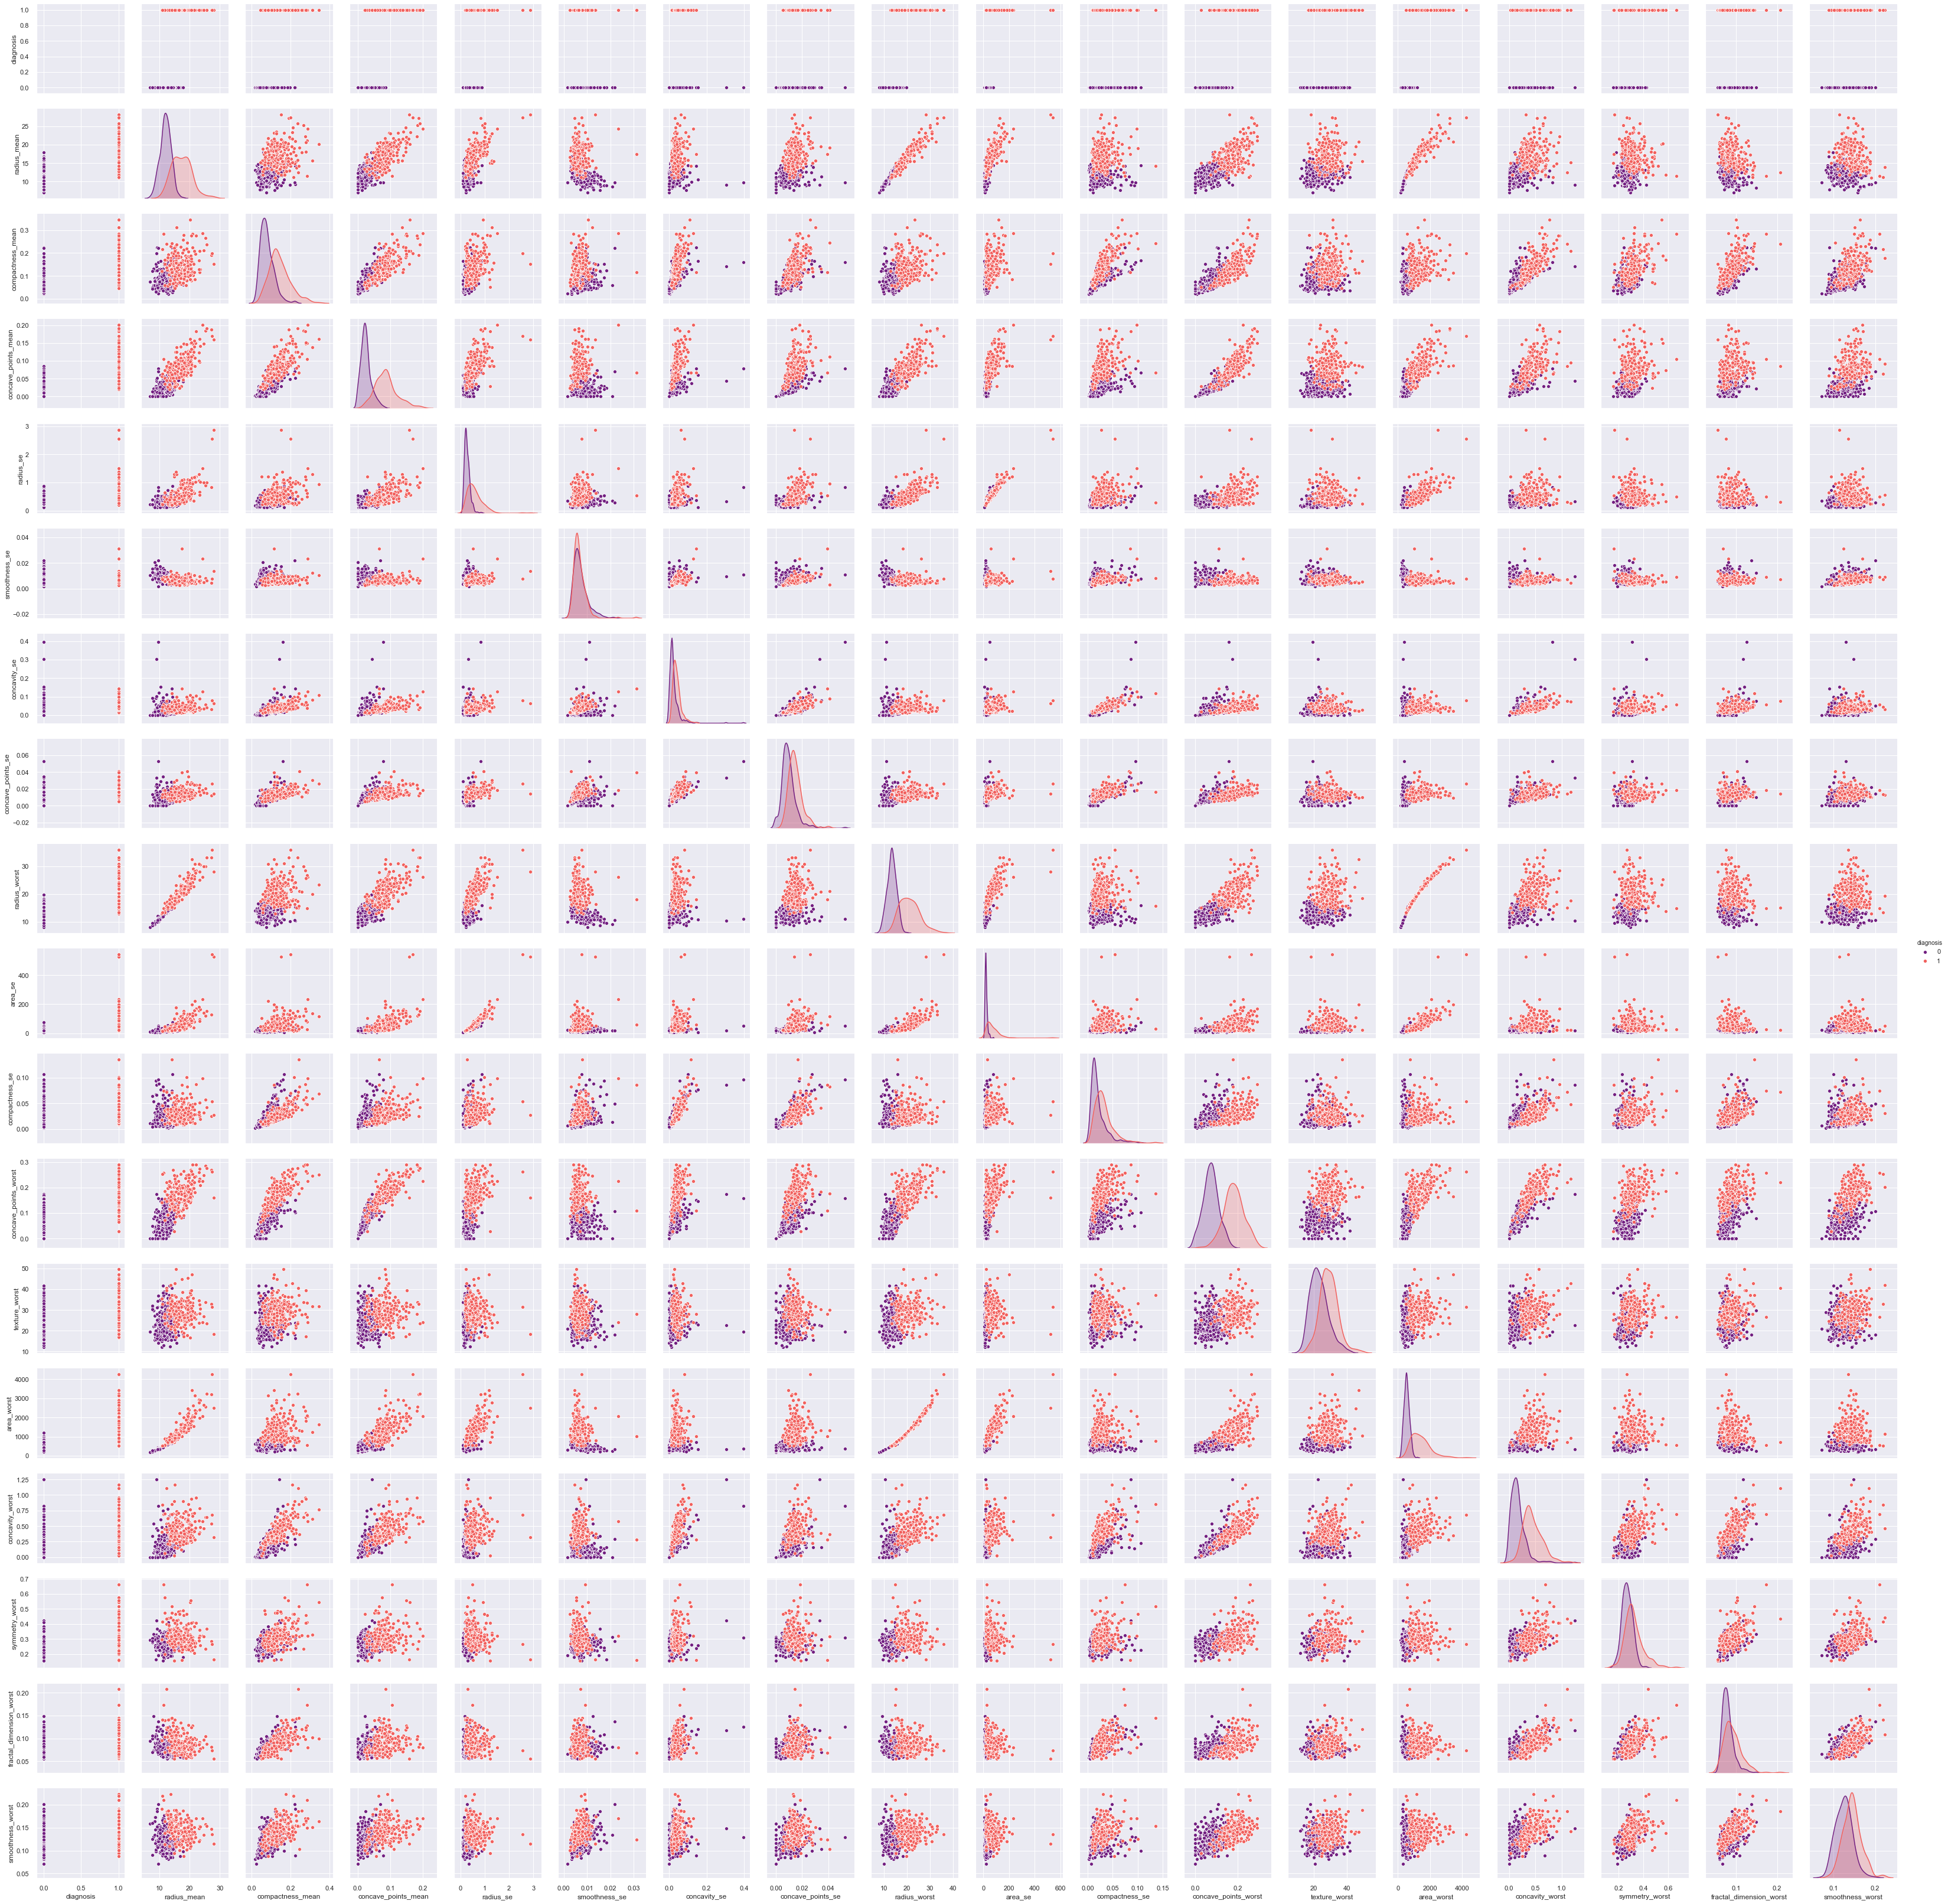

In [383]:
##############################################################################################
#Data Visualization
##############################################################################################
# visualizing all my features at once 

sns.set()
sns.pairplot(data=dataset_befs, hue = 'diagnosis', palette ='magma')

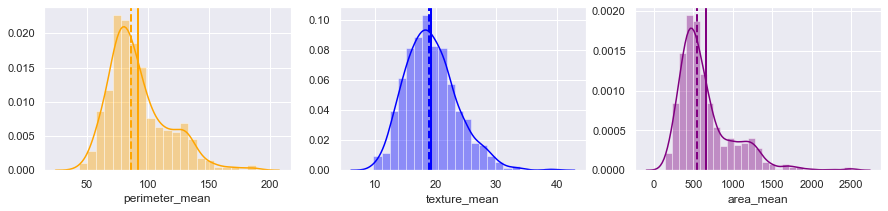

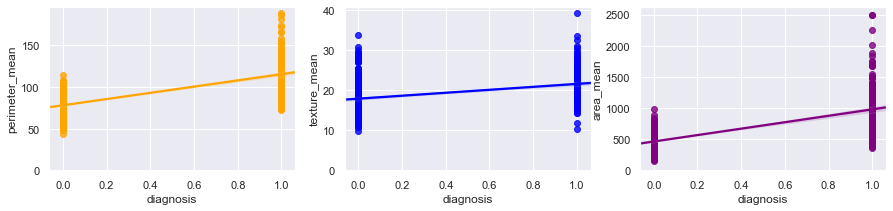

In [368]:
# some distribution plots, in colour

import matplotlib.pyplot as plt
import seaborn as sns
clr = ['orange', 'blue', 'purple']

# distribution plots

fig, axs = plt.subplots(ncols=3,figsize=(15,3))
plt.figure(1)
for i, var in enumerate(['perimeter_mean', 'texture_mean', 'area_mean']):
    plt.subplot(131 + i)
    sns.distplot(dataset_befs[var],  color = clr[i])
    plt.axvline(dataset_befs[var].mean(), color=clr[i], linestyle='solid', linewidth=2)
    plt.axvline(dataset_befs[var].median(), color=clr[i], linestyle='dashed', linewidth=2)

    
fig, axs = plt.subplots(ncols=3,figsize=(15,3))

for i, var in enumerate(['perimeter_mean', 'texture_mean', 'area_mean']):
    lm = sns.regplot(diagnosis, dataset_means[var], ax = axs[i], color= clr[i])
    lm.set(ylim=(0, None), alpha = 0.8)
    
# some slight positive skewness in these features

In [7]:
#Predictive Analysis
#Predictive model - first need to check for correlation in the dataset

dataset_fs = dataset_befs

df_fs_corr = dataset_fs.corr() #finds linear pearson correlation
df_fs_corr = df_fs_corr[df_fs_corr < 1] #to avoid correlating values with themselves (ie corr = 1)
df_fs_corr

,diagnosis,radius_mean,compactness_mean,concave_points_mean,radius_se,smoothness_se,concavity_se,concave_points_se,radius_worst,area_se,compactness_se,area_mean,concave_points_worst,texture_worst,area_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,smoothness_worst,perimeter_worst
diagnosis,NaN,0.730029,0.596534,0.776614,0.567134,-0.067016,0.253730,0.408042,0.776454,0.548236,0.292999,0.708984,0.793566,0.456903,0.733825,0.659610,0.416294,0.323872,0.421465,0.782914
radius_mean,0.730029,NaN,0.506124,0.822529,0.679090,-0.222600,0.194204,0.376169,0.969539,0.735864,0.206000,0.987357,0.744214,0.297008,0.941082,0.526911,0.163953,0.007066,0.119616,0.965137
compactness_mean,0.596534,0.506124,NaN,0.831135,0.497473,0.135299,0.570517,0.642262,0.535315,0.455653,0.738722,0.498502,0.815573,0.248133,0.509604,0.816275,0.510223,0.687382,0.565541,0.590210
concave_points_mean,0.776614,0.822529,0.831135,NaN,0.698050,0.027653,0.439167,0.615634,0.830318,0.690299,0.490424,0.823269,0.910155,0.292752,0.809630,0.752399,0.375744,0.368661,0.452753,0.855923
radius_se,0.567134,0.679090,0.497473,0.698050,NaN,0.164514,0.332358,0.513346,0.715065,0.951830,0.356065,0.732562,0.531062,0.194799,0.751548,0.380585,0.094543,0.049559,0.141919,0.719684
smoothness_se,-0.067016,-0.222600,0.135299,0.027653,0.164514,NaN,0.268685,0.328429,-0.230691,0.075150,0.336696,-0.166777,-0.102007,-0.074743,-0.182195,-0.058298,-0.107342,0.101480,0.314457,-0.217304
concavity_se,0.253730,0.194204,0.570517,0.439167,0.332358,0.268685,NaN,0.771804,0.186904,0.270895,0.801268,0.207660,0.440472,0.100241,0.188353,0.662564,0.197788,0.439329,0.168481,0.226680
concave_points_se,0.408042,0.376169,0.642262,0.615634,0.513346,0.328429,0.771804,NaN,0.358127,0.415730,0.744083,0.372320,0.602450,0.086741,0.342271,0.549592,0.143116,0.310655,0.215351,0.394999
radius_worst,0.776454,0.969539,0.535315,0.830318,0.715065,-0.230691,0.186904,0.358127,NaN,0.757373,0.204607,0.962746,0.787424,0.359921,0.984015,0.573975,0.243529,0.093492,0.216574,0.993708
area_se,0.548236,0.735864,0.455653,0.690299,0.951830,0.075150,0.270895,0.415730,0.757373,NaN,0.284840,0.800086,0.538166,0.196497,0.811408,0.385100,0.074126,0.017539,0.125389,0.761213


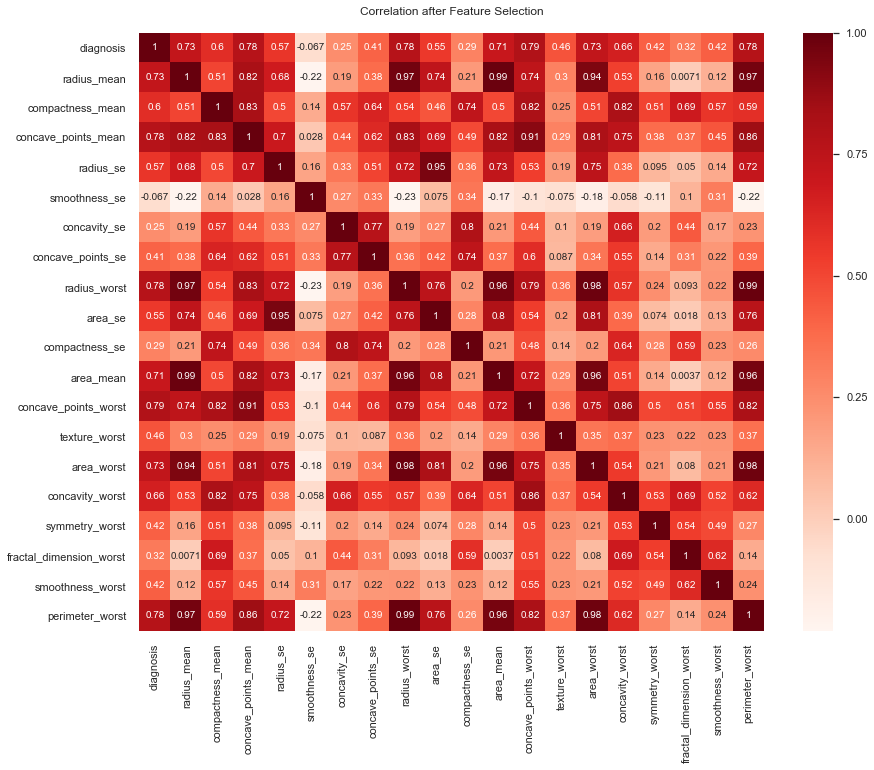

In [579]:
#Using Pearson Correlation
plt.figure(figsize=(14,11))
cor = dataset_befs.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.title("Correlation after Feature Selection\n", size=12)
plt.show()
# radius_mean is highly corr with radius_worst and area_worst, implies multicollinearity. 
            #Radius_worst is the most highly corr with diagnosis, so I will keep that one
# compactness 
# area mean highly corr w radius_mean, remove area_mean

Text(0.5, 0, 'Diagnosis')

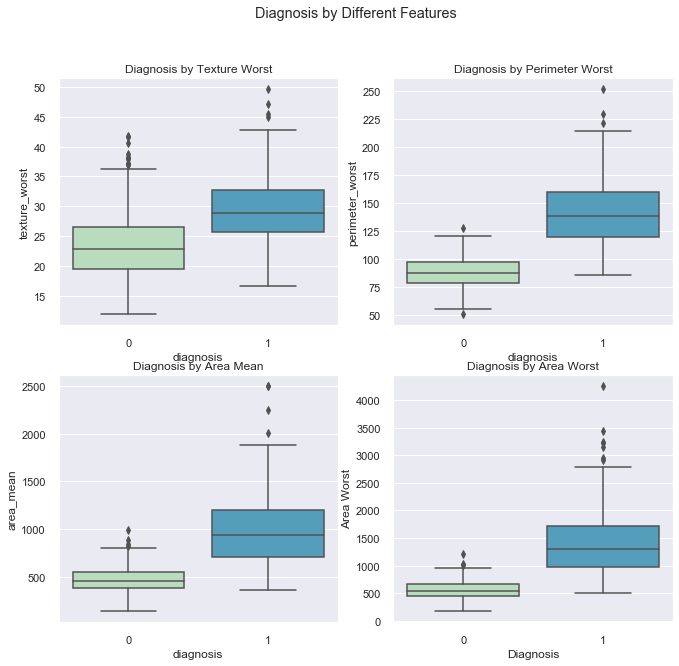

In [393]:
f, axes= plt.subplots(2, 2, figsize=(11,10), facecolor='white')
f.suptitle('Diagnosis by Different Features')

# radius_mean, concave_points_mean, texture_mean, symmetry_worst

ax1 = sns.boxplot(x='diagnosis',  y='perimeter_worst', palette='GnBu', data= dataset_befs, ax=axes[0,1])
ax1.title.set_text('Diagnosis by Perimeter Worst')
plt.ylabel("Perimeter Worst")
plt.xlabel("Diagnosis")

ax2 = sns.boxplot(x='diagnosis', y='texture_worst', palette='GnBu', data=dataset_befs, ax=axes[0,0])
ax2.title.set_text("Diagnosis by Texture Worst")
plt.ylabel("Texture Worst")
plt.xlabel("Diagnosis")

ax3= sns.boxplot(x='diagnosis', y='area_mean', palette='GnBu', data=dataset_befs, ax=axes[1,0])
ax3.title.set_text("Diagnosis by Area Mean")
plt.xlabel("Diagnosis")
plt.ylabel("Area Mean")


ax4=sns.boxplot(x='diagnosis', y='area_worst', palette='GnBu', data=dataset_befs, ax=axes[1,1])
ax4.title.set_text("Diagnosis by Area Worst")
plt.ylabel("Area Worst")
plt.xlabel("Diagnosis")

In [8]:
dataset_fs = dataset_befs

In [17]:
dataset_fs.shape

(569, 20)

In [9]:
#training and testing set size

train_size=int(0.80*dataset_fs.shape[0])
test_size=int(0.20*dataset_fs.shape[0])
print("80% training set size: "+ str(train_size))
print("20% validation set size: "+str(test_size))

# Shuffle dataset and get required features

Data=dataset_fs.sample(frac=1)
X_fs = dataset_fs.drop('diagnosis', axis=1)
y_fs = dataset_fs['diagnosis']

80% training set size: 455
20% validation set size: 113


In [10]:
##############################################################################################
# Split-out dataset
##############################################################################################
import numpy as np
array = dataset_fs.values
X_fs = dataset_fs.drop('diagnosis', axis=1)
y_fs = dataset_fs['diagnosis']
# dataset_fs['diagnosis'] = diagnosis

print('Class labels:', np.unique(y_fs)) # returns# split the data into train and test
# using holdout

from sklearn.model_selection import train_test_split
X_train_fs, X_validation_fs, y_train_fs, y_validation_fs = train_test_split(
    X_fs, y_fs, test_size=0.2, random_state = 1, stratify=y_fs) 

#stratify ensures the train_test_split method returns trianing and test subsets that have the same 
# proportion of class labels as the input dataset

# Eg, if 20% of patients have breast cancer and 80% don’t have breast cancer, setting ‘stratify’ to y 
# will ensure that the random split has 20% of patients w breast cancer and 70% of patients w/o breast cancer.
print('Dataset successfully split using stratify.')

Class labels: [0 1]
Dataset successfully split using stratify.


In [11]:
# first up: kNN baybeeee

from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 11, 
                          metric='minkowski', 
                          weights='distance',
                           p=2)

# Fit the classifier to the data
knn_clf_fs = knn.fit(X_train_fs,y_train_fs)

C:\Users\eklas\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\eklas\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
C:\Users\eklas\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWar

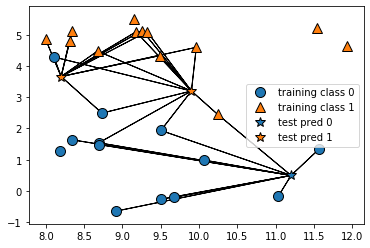

In [12]:
# Visualizing the neighbours 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
import mglearn
from IPython.display import display
mglearn.plots.plot_knn_classification(n_neighbors=11)

In [13]:
#show first 5 model predictions on the test data
y_pred_fs = knn.predict(X_validation_fs)
y_pred_fs[0:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [14]:
#check accuracy of our model on the test data
from sklearn.model_selection import cross_val_score
print('kNN Accuracy with feature selection: ') 
knn_fs_score = knn.score(X_validation_fs, y_validation_fs)*100
print('%.2f' % knn_fs_score + '%')
# kNN accuracy with feature selection: 95.61%. Default kNN using entire dataset: 92.11%.

kNN Accuracy with feature selection: 
95.61%


--------------- KNeighborsClassifier : classifier.fit [Done]
--------------- KNeighborsClassifier : classifier.predict [Done]

kNN Confusion FS Matrix:

[[70  2]
 [ 3 39]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        72
           1       0.95      0.93      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

kNN Accuracy with fs and n_neighbors = 11: 
95.61%
--------------- mean error calculation [Done]


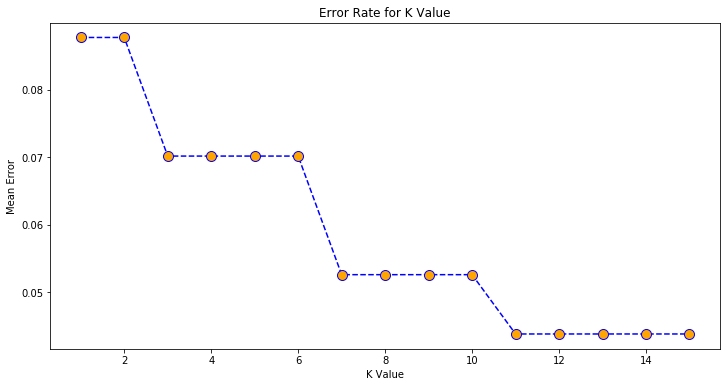

In [15]:
##################################### [KNeighborsClassifier]
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=11,p=2)
classifier.fit(X_train_fs, y_train_fs)

print('--------------- KNeighborsClassifier : classifier.fit [Done]')

y_pred_fs = classifier.predict(X_validation_fs)

print('--------------- KNeighborsClassifier : classifier.predict [Done]\n')

from sklearn.metrics import classification_report, confusion_matrix
print('kNN Confusion FS Matrix:\n')
print(confusion_matrix(y_validation_fs,y_pred_fs))
print(classification_report(y_validation_fs,y_pred_fs))

print('kNN Accuracy with fs and n_neighbors = 11: ') 
print('%.2f' % knn_fs_score + '%') #score


import numpy as np
error = []

# Calculating error for K values between 1 and 16
for i in range(1, 16): # 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_fs, y_train_fs)
    pred_i = knn.predict(X_validation_fs)
    error.append(np.mean(pred_i != y_validation_fs))

print('--------------- mean error calculation [Done]')

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

plt.plot(range(1, 16), error, color='blue', linestyle='dashed', marker='o', 
         markerfacecolor='orange', markersize=10)
plt.title('Error Rate for K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()
# n_neighbours 11 and above has the lowest error rate.

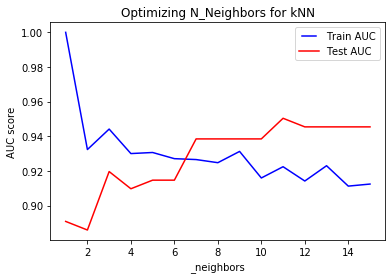

In [16]:
# find optimal n_neighbours for kNN
from sklearn.metrics import roc_curve, auc

neighbors = list(range(1,16))
train_results = []
test_results = []
for n in neighbors:
   model = KNeighborsClassifier(n_neighbors=n)
   model.fit(X_train_fs, y_train_fs)
   train_pred = model.predict(X_train_fs)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_fs, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred_fs = model.predict(X_validation_fs)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_validation_fs, y_pred_fs)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(neighbors, train_results, 'b', label='Train AUC')
line2, = plt.plot(neighbors, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('_neighbors')
plt.title('Optimizing N_Neighbors for kNN')
plt.show()

# again, looks like 11 is my optimal n_neighbors param.

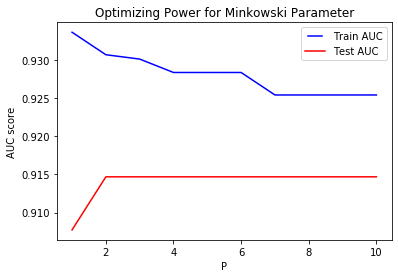

In [17]:
# find optimal p value for kNN to reduce overfit

distances = [1, 2, 3, 4, 5,6,7,8,9,10]
train_results = []
test_results = []
for p in distances:
   model = KNeighborsClassifier(p=p)
   model.fit(X_train_fs, y_train_fs)
   train_pred = model.predict(X_train_fs)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_fs, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred_fs = model.predict(X_validation_fs)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_validation_fs, y_pred_fs)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(distances, train_results, 'b', label='Train AUC')
line2, = plt.plot(distances, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('P')
plt.title("Optimizing Power for Minkowski Parameter")
plt.show()
# Power parameter for Minkowski metric, p=2 is best for my data. When p=1, 
# this is equivalent to using manhattan_distance(l1), and euliddean_distance(l2) 
# for p=2. For arbitrary p, minkowski distance (l_p) is used

In [18]:
#cross-validation for kNN

from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv_fs = KNeighborsClassifier(n_neighbors=11, p=2)
#train model with cv of 5 
knn_fs_cv_scores = cross_val_score(knn_cv_fs, X, y, cv=6)*100

#print each cv score (accuracy) and average them
print('CV scores: {}%'.format(knn_fs_cv_scores))

print('\nkNN with cross-validation mean score: {:.2f}%'.format(np.mean(knn_fs_cv_scores)))


#using cross-validation, avg accuracy is 93.33%

CV scores: [88.42105263 91.57894737 95.78947368 94.73684211 93.68421053 95.74468085]%

kNN with cross-validation mean score: 93.33%


In [19]:
from sklearn import metrics
print('kNN error rates: \n')

print('Mean Absolute Error: {:.3f}'.format(metrics.mean_absolute_error(y_validation_fs, y_pred_fs)))
print('Mean Squared Error: {:.3f}'.format(metrics.mean_squared_error(y_validation_fs, y_pred_fs)))
print('Root Mean Squared Error: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_validation_fs, y_pred_fs))))

kNN error rates: 

Mean Absolute Error: 0.070
Mean Squared Error: 0.070
Root Mean Squared Error: 0.265


In [20]:
#knn predictions

y_pred_fs = knn.predict(X_validation_fs)
print('Misclassification for kNN:\n')
print('Misclassified examples:  %d' % (y_validation_fs != y_pred_fs).sum())
print('Misclassification rate: %.3f' % ((y_validation_fs != y_pred_fs).sum()/y_pred_fs.sum()) + ' %')

Misclassification for kNN:

Misclassified examples:  5
Misclassification rate: 0.128 %


In [21]:
# tuning the kNN model

# use AUC (area under curve)

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_validation_fs, y_pred_fs)
knn_roc_auc = auc(false_positive_rate, true_positive_rate)*100
print('kNN ROC: {:.2f}%'.format(knn_roc_auc))

kNN ROC: 94.54%


In [22]:
# Now, to scale my training X variables and compare.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scale = scaler.fit_transform(X_train_fs.astype(np.float64))
X_validation_scale = scaler.transform(X_validation_fs.astype(np.float64))
knn_clf_fs.fit(X_train_scale, y_train_fs)

y_pred_fs = knn_clf_fs.predict(X_validation_scale)

print("Accuracy of kNN (scaled and fs): {:.2f}%".format(knn_fs_score))

scores_cv_fs = cross_val_score(knn_clf_fs, X_train_scale, y_train_fs, cv=10)
print("Mean of kNN cross-validated scores (scaled and fs): {:.2f}% (std = {:.2f})".format(scores_cv_fs.mean()*100,
                                                                                       scores_cv_fs.std()),
                                                                                     end='\n')

Accuracy of kNN (scaled and fs): 95.61%
Mean of kNN cross-validated scores (scaled and fs): 96.29% (std = 0.03)


In [23]:
# re-fit model

from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 11, 
                          metric='minkowski', 
                          weights='distance',
                           p=2)

# Fit the classifier to the data
knn_clf_fs = knn.fit(X_train_fs,y_train_fs)

In [24]:
y_prob_fs = knn_clf_fs.predict_proba(X_validation_fs)[:,1] # positive class prediction probabilities  
y_pred_fs = np.where(y_prob_fs > 0.5, 1, 0) # threshold the probabilities to give class predictions
knn_clf_fs.score(X_validation_fs, y_pred_fs)

1.0

In [25]:
# building a ROC curve for kNN
# start with AUC

knn_auc_roc=metrics.roc_auc_score(y_validation_fs,y_pred_fs)*100

print('kNN AUC score: {:.2f}%'.format(knn_auc_roc))

kNN AUC score: 95.04%


In [26]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_validation_fs, y_prob_fs)
knn_roc_auc = auc(false_positive_rate, true_positive_rate)*100
print('kNN ROC score: {:.2f}%'.format(knn_roc_auc))

kNN ROC score: 96.10%


Text(0.5, 0, 'False Positive Rate')

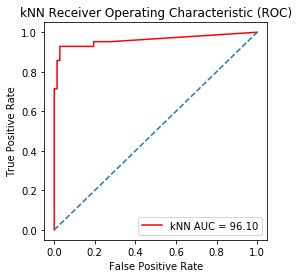

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.title('kNN Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'kNN AUC = %0.2f' % knn_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [28]:
# Next up: decision tree classifier

##################################### [DecisionTreeClassifier]
from sklearn.tree import DecisionTreeClassifier
import random

# Train-test split to find best features for this model from my fs dataset
from sklearn.model_selection import train_test_split
X_fs = dataset_fs.drop('diagnosis', axis = 1) #all vars, not including diagnosis
y_fs = dataset_fs['diagnosis'] #binary: diabetes no (0) or yes (1)

X_train_fs, X_validation_fs, y_train_fs, y_validation_fs = train_test_split(X_fs, y_fs, test_size=0.20, 
                                                                            random_state=1)

classifier_dt_fs = DecisionTreeClassifier()
classifier_dt_fs.fit(X_train_fs, y_train_fs)
print('--------------- DecisionTreeClassifier : classifier.fit [Done]')

y_pred_fs = classifier_dt_fs.predict(X_validation_fs)

print('--------------- DecisionTreeClassifier : classifier.predict [Done]')


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from time import time
from scipy.stats import randint

# use feature importance 
feature_fi = dataset_fs
                 
X_fi = feature_fi.drop('diagnosis', axis=1)
y_fi = dataset_fs['diagnosis']

#build a classifier
clf_fi = DecisionTreeClassifier()


# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.2f}% (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate]*100,
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


#specify parameters and distributions to sample from 
param_dist = {"max_depth": [2, 10], # I set a limit of 10 for max depth, otherwise all models would select None 
              "max_features": randint(1, 9),
              "random_state": randint(0,100),
              "min_samples_split": randint(2,10),
              "min_samples_leaf": randint(1, 9), 
              "criterion": ["gini", "entropy"]} 
#run randomized search
n_iter_search = 50
random_search = RandomizedSearchCV(clf_fi, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv = 10)

start = time()
random_search.fit(X_fi, y_fi)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)
# rank 1 yields 9{'criterion': 'gini', 'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 1, 
#'min_samples_split': 8, 'random_state': 54}
# Using the fs dataset (vs the entire dataset), I improved my accuracy by over 2%. 

--------------- DecisionTreeClassifier : classifier.fit [Done]
--------------- DecisionTreeClassifier : classifier.predict [Done]
RandomizedSearchCV took 5.48 seconds for 50 candidates parameter settings.
Model with rank: 1
Mean validation score: 95.26% (std: 0.027)
Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 8, 'random_state': 54}

Model with rank: 2
Mean validation score: 94.91% (std: 0.034)
Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 7, 'min_samples_leaf': 5, 'min_samples_split': 8, 'random_state': 13}

Model with rank: 3
Mean validation score: 94.56% (std: 0.031)
Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 9, 'random_state': 81}

Model with rank: 3
Mean validation score: 94.56% (std: 0.029)
Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 9, 'random_state

In [29]:
# more decision tree classification

from sklearn.model_selection import train_test_split
dt_X = dataset_fs.drop('diagnosis', axis=1)
dt_y = dataset_fs['diagnosis']

X_train, X_validation, y_train, y_validation = train_test_split(dt_X, dt_y, test_size=.2, random_state=100)

In [30]:
# to find the optimal alpha number, I am going to do some more pruning.

print(__doc__)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Automatically created module for IPython interactive environment


In [31]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the Last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the Last tree is: 1 with ccp_alpha: 0.3272984419327777


Text(0.5, 1.0, 'Total Impurity vs Effective Alpha for Training Set')

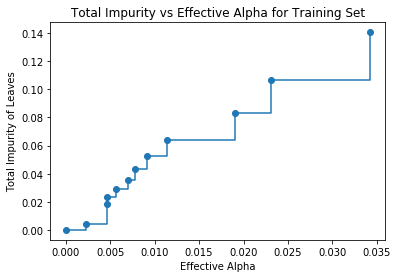

In [32]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("Effective Alpha")
ax.set_ylabel("Total Impurity of Leaves")
ax.set_title("Total Impurity vs Effective Alpha for Training Set")

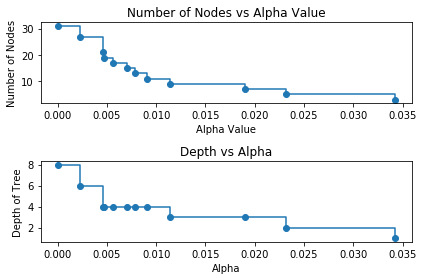

In [33]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("Alpha Value")
ax[0].set_ylabel("Number of Nodes")
ax[0].set_title("Number of Nodes vs Alpha Value")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Depth of Tree")
ax[1].set_title("Depth vs Alpha")
fig.tight_layout()

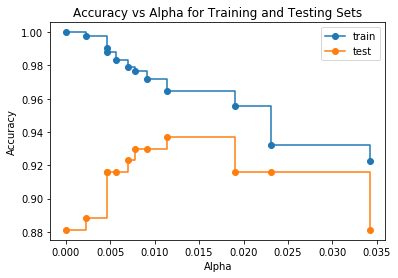

In [34]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Alpha for Training and Testing Sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

# when ccp_alpha is left to default 0, it leads to badly overfitting, as seen in the 100% accuracy. 
# 0.11 to 0.15 is the sweet spot value of Alpha where testing accuracy is highest. 

In [35]:
#Decision tree classifier and use the fit method to train the model
#Information gain is used to decide which feature to split on at each step in building the tree. 
#Simplicity is best, so I want to keep my tree small, by choosing the split that
# results in the purest daughter nodes. 
#A commonly used measure of purity is called information. 
#For each node of the tree, the information value measures how much information a feature gives us about the class. 
#The split with the highest information gain will be taken as the first split and 
#the process will continue until all children nodes are pure, or until the information gain is 0.

from sklearn import tree
dt_clf_fs = tree.DecisionTreeClassifier(ccp_alpha = 0.11, max_features = 8,
                                  criterion = 'entropy', max_depth = 4, min_samples_leaf=7,
                                 random_state = 2, min_samples_split = 9)

# Fit the model, see the params
dt_clf_fs = dt_clf_fs.fit(X_train_fs, y_train_fs)
dt_clf_fs

DecisionTreeClassifier(ccp_alpha=0.11, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2, splitter='best')

In [36]:
#Report my pruned Decision Tree's accuracy 
# With the default setting, my Decision Tree yielded 100% accuracy. This, of course, means it was overfit. 
# Pruned, it yields 92% accuracy.

from sklearn import metrics
def measure_perf(dt_X, dt_y, dt_clf_fs, show_accuracy=True,
                show_classification_report=True, show_confusion_matrix=True):
    y_pred_fs = dt_clf_fs.predict(dt_X)
    if show_accuracy:
        print('Decision Tree Accuracy: {0:.2f}% '.format(
                metrics.accuracy_score(dt_y, y_pred_fs)*100
                ),"\n")
        if show_classification_report:
            print("Classification report")
            print(metrics.classification_report(dt_y, y_pred_fs), "\n")
        if show_confusion_matrix:
            print("Decision Tree confusion matrix")
            print(metrics.confusion_matrix(dt_y, y_pred_fs),"\n")
# measure performance

measure_perf(X_train_fs, y_train_fs, dt_clf_fs, 
            show_classification_report = True, show_confusion_matrix = True)
# 92.75, pretty good ! ccp_alpha = .011, entropy, Max_depth = 3, min_samples_leaf = 4
# lots of falsely predicted negatives
# unpruned, DT yields 100% accuracy, which means it's overfit. Then, passing these parameters reduces to 97.36%. 
# Then, I passed ccp_alpha = 0.11 to avoid overfitting again, and it yielded 92% accuracy. This is much better because
# it's not prone to overfit. 

Decision Tree Accuracy: 92.75%  

Classification report
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       285
           1       0.95      0.85      0.90       170

    accuracy                           0.93       455
   macro avg       0.93      0.91      0.92       455
weighted avg       0.93      0.93      0.93       455
 

Decision Tree confusion matrix
[[278   7]
 [ 26 144]] 



In [37]:
# Import 'r2_score'

from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true (y_true) and predicted (y_predict) values based on the metric chosen. """
    
    score = r2_score(y_true, y_predict)
  
    # Return the score
    return score

In [38]:
# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

def fit_model(X_fs, y_fs):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 100)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X_fs, y_fs)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [29]:
# Fit the training data to the model using grid search
tree_reg = fit_model(X_train_fs, y_train_fs)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(tree_reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


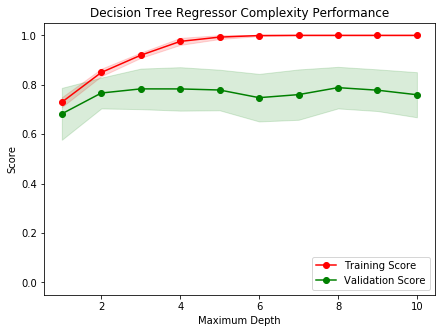

In [39]:
# Produce complexity curve for varying training set sizes and maximum depths
%matplotlib inline
# %pylab inline

from IPython.display import display
import visuals3 as vs
vs.ModelComplexity(X_train_fs, y_train_fs)
#highest valiation score is at 4 for max depth

In [40]:
# Tree visualization

import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

from IPython.display import Image
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

from sklearn.tree import DecisionTreeClassifier
tree_model = tree.DecisionTreeClassifier(ccp_alpha = 0.11, max_features = 6,
                                  criterion = 'entropy', max_depth = 4, min_samples_leaf=4,
                                 random_state = 23, min_samples_split = 9)

tree_model.fit(X_train_fs, y_train_fs)


dot_data = export_graphviz(tree_model,
                          filled=True,
                          rounded=True,
                          class_names=['breast cancer',
                                      'no breast cancer'],
                          feature_names = ['radius_mean', 'compactness_mean', 'concave_points_mean', 
                                           'radius_se', 'smoothness_se', 'concavity_se', 'concave_points_se', 
                                           'radius_worst', 'area_se', 'compactness_se', 'area_mean', 
              'concave_points_worst','texture_worst', 'area_worst', 'concavity_worst', 'symmetry_worst', 
              'fractal_dimension_worst', 'smoothness_worst', 'perimeter_worst'],
                          out_file=None)
# graph.title("Diagnosis Decision tree")
graph= graph_from_dot_data(dot_data)
graph.write_png('pruned_tree.png')  #see home page for pruned_tree.png

True

In [41]:
# pruning

from sklearn.tree._tree import TREE_LEAF

def prune_index(inner_tree, index, threshold):
    if inner_tree.value[index].min() < threshold:
        # turn node into a leaf by "unlinking" its children
        inner_tree.children_left[index] = TREE_LEAF
        inner_tree.children_right[index] = TREE_LEAF
    # if there are shildren, visit them as well
    if inner_tree.children_left[index] != TREE_LEAF:
        prune_index(inner_tree, inner_tree.children_left[index], threshold)
        prune_index(inner_tree, inner_tree.children_right[index], threshold)

print(sum(dt.tree_.children_left < 0))
# start pruning from the root
prune_index(dt.tree_, 0, 5)
sum(dt.tree_.children_left < 0)

# means the code has created 22 new leaf nodes by practically removing links to ancestors

22


26

In [42]:
from sklearn.metrics import accuracy_score

tree_model_score = tree_model.score(X_train_fs, y_train_fs)
print('Accuracy of Decision Tree Training model: %.2f' %(tree_model.score(X_train_fs, y_train_fs)*100) + '%')
#accuracy of tree model: 93.41% with these params, reasonably good

Accuracy of Decision Tree Training model: 93.41%


In [43]:
#Decision Tree predictions

y_pred_fs = tree_model.predict(X_validation_fs)
print('Decision Tree Misclassified examples:  %d' % (y_validation_fs != y_pred_fs).sum())
print('Decision Tree Misclassification rate: %.3f' % ((y_validation_fs != y_pred_fs).sum()/y_pred_fs.sum()) + ' %')

Decision Tree Misclassified examples:  7
Decision Tree Misclassification rate: 0.163 %


In [44]:
# Gini index vs Entropy?

# Printing the dataset shape 
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score

df = dataset_fs
def importdata():
    df=dataset_fs
    print ("Dataset Length: ", len(df)) 
    print ("Dataset Shape: ", df.shape) 
      
#Printing the dataset obseravtions 
    print ("Dataset: ",df.head()) 
    return df
  
# Function to split the dataset 
def splitdataset(df): 
      
#Printing the dataset obseravtions 
    print ("Dataset: ",df_fs.head()) 
    return df_fs
  
# Function to split the dataset 
def splitdataset(df): 
  
     # Separating the target variable 
    df_X = dataset[['radius_mean', 'compactness_mean', 'concave_points_mean', 'radius_se', 'smoothness_se', 
            'concavity_se', 'concave_points_se', 'radius_worst', 'area_se', 'compactness_se', 'area_mean', 
              'concave_points_worst','texture_worst', 'area_worst', 'concavity_worst', 'symmetry_worst', 
              'fractal_dimension_worst', 'smoothness_worst', 'perimeter_worst']].values
    df_y = dataset['diagnosis'].values
#Splitting the dataset into train and test 
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.2, random_state = 44) 

    return df_X, df_y, X_train, X_test, y_train, y_test


# # Function to perform training with gini Index. 
def train_using_gini(X_train, X_test, y_train): 
  
#     # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=7, min_samples_leaf=5) 
  
#     # Performing training 
    clf_gini.fit(X_train, y_train) 
    return clf_gini

# Function to perform training with entropy. 
def train_using_entropy(X_train, X_test, y_train): 
  
    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 2, min_samples_leaf = 5) 
  
    # Performing training 
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy 
# Function to make predictions 
def prediction(X_test, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 

# Function to calculate accuracy 
def calc_accuracy(y_test, y_pred): 
      
    print("\nConfusion Matrix: \n",          
    confusion_matrix(y_test, y_pred)) 
      
    print("\nAccuracy: \n%.2f" %(accuracy_score(y_test,y_pred)*100) + '%')
      
    print("\nReport: \n",
    classification_report(y_test, y_pred)) 

# Driver code 
def main(): 
      
    # Building Phase 
    data = df 
    df_X, df_y, X_train, X_test, y_train, y_test = splitdataset(data) 
    clf_gini = train_using_gini(X_train, X_test, y_train) 
    clf_entropy = train_using_entropy(X_train, X_test, y_train) 
      
    # Operational Phase
    #Gini Index is a metric to measure how often a randomly chosen element would be incorrectly identified
    print("Results Using Gini Index:") 
#      
    # Prediction using gini 
    y_pred_gini = prediction(X_test, clf_gini) 
    calc_accuracy(y_test, y_pred_gini) 
      
    print("Results Using Entropy:") 
    # Prediction using entropy, another measure for correctly classifying
    y_pred_entropy = prediction(X_test, clf_entropy) 
    calc_accuracy(y_test, y_pred_entropy) 
      
      
# Calling main function 
if __name__=="__main__": 
    main() 
    
# overall, somewhat surprisingly, gini performed better than entropy. 

Results Using Gini Index:
Predicted values:
[1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0
 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1
 1 1 1]

Confusion Matrix: 
 [[73  2]
 [ 3 36]]

Accuracy: 
95.61%

Report: 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        75
           1       0.95      0.92      0.94        39

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Results Using Entropy:
Predicted values:
[0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0
 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1
 1 1 1]

Confusion Matrix: 
 [[73  2]
 [ 6 33]]

Accuracy: 


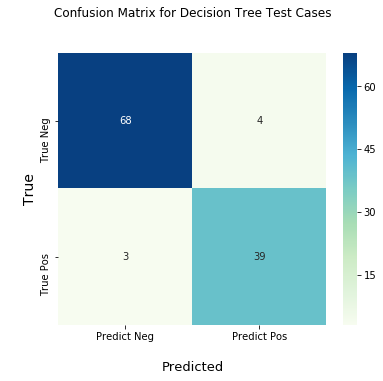

In [45]:
#Decision tree confusion matrix

from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_validation_fs,tree_model.predict(X_validation_fs))
sns.heatmap(cm,annot=True, cmap="GnBu", fmt="d", 
            xticklabels = ['Predict Neg', 'Predict Pos'], 
            yticklabels = ['True Neg', 'True Pos'])
plt.xlabel('\nPredicted', size=13)
plt.ylabel('\nTrue', size=14)
plt.title("Confusion Matrix for Decision Tree Test Cases\n\n")
plt.show()

In [46]:
# Gaussian Naive Bayes Baybeeeeee
# used becasue we're assuming our features follow a normal distribution, and can contain decimal vals.

##############################################################################################
# Split-out dataset
##############################################################################################

##################################### [GaussianNB]
from sklearn.naive_bayes import GaussianNB

array = dataset_fs.values
X = dataset_fs.drop('diagnosis', axis = 1) #all vars, not including diagnosis
y = dataset_fs['diagnosis'] #binary: breast cancer no (0) or yes (1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print('--------------- Split-out dataset [Done]')

classifier = GaussianNB()
classifier.fit(X_train, y_train)

print('--------------- GaussianNB : classifier.fit [Done]')

y_pred = classifier.predict(X_test)

print('--------------- GaussianNB : classifier.predict [Done]')

from sklearn.metrics import classification_report, confusion_matrix

print ("\n----------------------> [GaussianNB]\n\n Gaussian Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 6 misclassifications total, is better at predicting negative breast 
# cancer than positive breast cancer.

--------------- Split-out dataset [Done]
--------------- GaussianNB : classifier.fit [Done]
--------------- GaussianNB : classifier.predict [Done]

----------------------> [GaussianNB]

 Gaussian Confusion Matrix:

[[70  2]
 [ 4 38]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [47]:
##################################### [GaussianNB]
from sklearn.naive_bayes import GaussianNB
# For preprocessing the data
from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import Imputer
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score

# split the data into train and test
# using holdout

from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Setting ‘stratify’ to y makes our training split represent the proportion of each value in the y variable. 
# Eg, if 20% of patients have breast cancer and 80% don’t have breast cancer, setting ‘stratify’ to y 
# will ensure that the random split has 20% of patients w breast cancer and 80% of patients w/o breast cancer.
print('Dataset successfully split using stratify.')

from sklearn.metrics import accuracy_score

classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB = classifier

y_pred = GaussianNB.predict(X_validation)

print('Accuracy of Gaussian Naive Bayes training model: %.2f' %(GaussianNB.score(X_train, y_train)*100) + '%')
#accuracy of tree model: 94%, less good than decision tree
# random_state=1, test_size= .20

Dataset successfully split using stratify.
Accuracy of Gaussian Naive Bayes training model: 94.29%


In [48]:
# fit the Gaussian NB model
from sklearn.metrics import accuracy_score


classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# accuracy

gaussianNB_accur = accuracy_score(y_test, y_pred, normalize = True)*100 #normalized 
print('Naive Bayes Gaussian Testing accuracy was: %.2f' %+ gaussianNB_accur + '%')

Naive Bayes Gaussian Testing accuracy was: 95.61%


In [49]:
y_pred_tot_count = len(y_pred)
y_pred_tot_count

114

In [50]:
#Gaussian predictions and misclassification rate

import numpy as np
# numpy.sum(y_pred)
# numpy.count_nonzero(y_pred)
GNB_misclass = np.count_nonzero(y_test!= y_pred)
print('Gaussian NB misclassified examples:  %d' % GNB_misclass)
GNB_misclass/y_pred_tot_count
print('Gaussian NB misclassification rate: %.3f' % (GNB_misclass/y_pred_tot_count) + '%')

Gaussian NB misclassified examples:  5
Gaussian NB misclassification rate: 0.044%


In [52]:
##################################
###########Gaussian NB######################
##################################
from sklearn.naive_bayes import GaussianNB

model_naive = GaussianNB()
model_naive.fit(X_train, y_train)

y_prob = model_naive.predict_proba(X_test)[:,1] # This gives me positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # Threshold the probabilities to give class predictions.
model_naive.score(X_test, y_pred)

1.0

In [53]:
scores = cross_val_score(model_naive, X, y, cv=10, scoring='accuracy')*100
print('Gaussian NB Cross-validation scores: \n {}%'.format(scores))
mean_cv_GNB_scores = scores.mean()
print('\nMean CV scores for Gaussian NB: {:.2f}%'.format(mean_cv_GNB_scores))

Gaussian NB Cross-validation scores: 
 [94.73684211 87.71929825 91.22807018 94.73684211 92.98245614 96.49122807
 92.98245614 98.24561404 94.73684211 96.42857143]%

Mean CV scores for Gaussian NB: 94.03%


In [54]:
# Gaussian NB Confusion matrix
gnb_confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
print("Confusion matrix for Gaussian NB:")
gnb_confusion_matrix

Confusion matrix for Gaussian NB:


array([[72,  0],
       [ 5, 37]], dtype=int64)

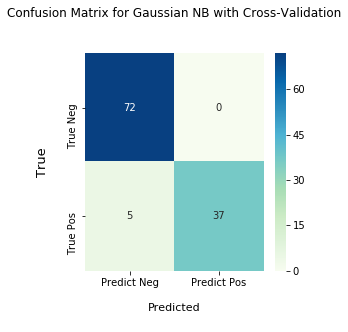

In [55]:
#Test case only confusion matrix

#Gaussian Confusion Matrix with Cross-Validation
from sklearn.metrics import confusion_matrix

# cm = confusion_matrix(y_validation,LR.predict(X_validation))

plt.figure(figsize=(4,4))
cm_gnb = confusion_matrix(y_test, model_naive.predict(X_test))
sns.heatmap(cm_gnb,annot=True, cmap="GnBu", fmt="d", 
            xticklabels = ['Predict Neg', 'Predict Pos'], 
            yticklabels = ['True Neg', 'True Pos'])
plt.xlabel('\nPredicted\n', size=11)
plt.ylabel('\nTrue\n', size=13)
plt.title("Confusion Matrix for Gaussian NB with Cross-Validation\n\n")
plt.show()

# GaussianNB is better at not prodicting a positive result when the case is actually negative (0 false positives).
# However, it has a tendency to predict negative when the test case is actually positive (5 false negatives).

In [56]:
gnb_auc_roc=metrics.classification_report(y_test,y_pred)
print('AUC ROC report for Gaussian NB model: \n', gnb_auc_roc)

AUC ROC report for Gaussian NB model: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



In [57]:
gnb_auc_roc=metrics.roc_auc_score(y_test,y_pred)*100
print('AUC ROC score for Gaussian NB: {:.2f}%'.format(gnb_auc_roc))

AUC ROC score for Gaussian NB: 94.05%


In [58]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
gnb_roc_auc = auc(false_positive_rate, true_positive_rate)*100
print('ROC AUC score for Gaussian NB: {:.2f}%'.format(gnb_roc_auc))

# again, recall is very good for correctly identifying negative cases, but it's not so good at correctly identifying
# positive test cases (0.88). 

ROC AUC score for Gaussian NB: 99.21%


Text(0.5, 0, 'False Positive Rate')

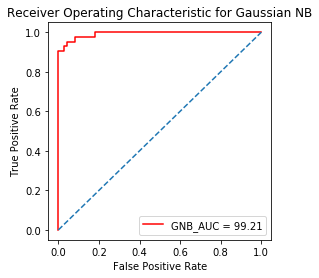

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.title('Receiver Operating Characteristic for Gaussian NB')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'GNB_AUC = %0.2f' % gnb_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

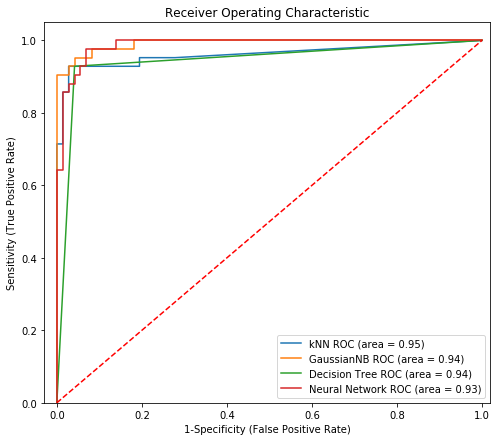

In [76]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [

{
    'label': 'kNN',
    'model': KNeighborsClassifier(n_neighbors = 11, 
                          metric='minkowski', 
                          weights='distance',
                           p=2),
},    
{
    'label': 'GaussianNB',
    'model': GaussianNB(),
},  
{
    'label': 'Decision Tree',
    'model': DecisionTreeClassifier(ccp_alpha = 0.11, max_features = 3,
                                  criterion = 'gini', max_depth = 4, min_samples_leaf=1,
                                 random_state = 54, min_samples_split = 1)
}, 
{
    'label': 'Neural Network',
    'model': MLPClassifier(),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.03, 1.02])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
fig = plt.gcf()
fig.savefig('ROC_combos.png', dpi=100)
fig.set_size_inches(8, 7, forward=True)
plt.show()

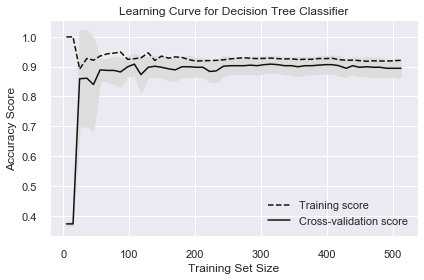

In [558]:
# Learning curves, to determine the optimal number of test/training dataset size
# first up: DecisionTree

# Load libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import learning_curve
features = ['diagnosis','radius_worst', 'concave_points_worst', 'concave_points_mean','texture_worst',
                      'texture_mean','smoothness_worst','radius_mean','area_mean',
                      'area_worst','concavity_worst','symmetry_worst',
                      'fractal_dimension_worst','concavity_mean','compactness_mean']
target = 'diagnosis'

# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(DecisionTreeClassifier(ccp_alpha = 0.11, max_features = 8,
                                  criterion = 'entropy', max_depth = 3, min_samples_leaf=6,
                                 random_state = 45, min_samples_split = 4), 
                                                        X, 
                                                        y,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#EEEEEE")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve for Decision Tree Classifier")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


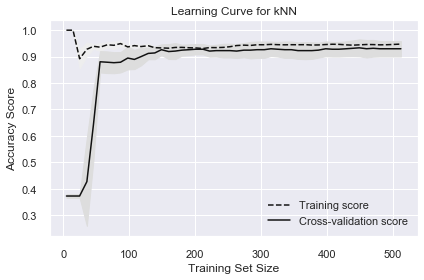

In [559]:
# Next up:

# first up: kNN

# Load libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import learning_curve
features = ['diagnosis','radius_worst', 'concave_points_worst', 'concave_points_mean','texture_worst',
                      'texture_mean','smoothness_worst','radius_mean','area_mean',
                      'area_worst','concavity_worst','symmetry_worst',
                      'fractal_dimension_worst','concavity_mean','compactness_mean']
target = 'diagnosis'

# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(), 
                                                        X, 
                                                        y,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#EEEEEE")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve for kNN")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

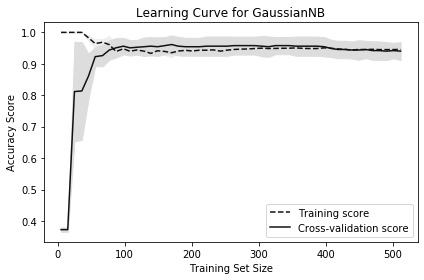

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import learning_curve

features = ['diagnosis','radius_worst', 'concave_points_worst', 'concave_points_mean','texture_worst',
                      'texture_mean','smoothness_worst','radius_mean','area_mean',
                      'area_worst','concavity_worst','symmetry_worst',
                      'fractal_dimension_worst','concavity_mean','compactness_mean']
target = 'diagnosis'

# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(GaussianNB(), 
                                                        X, 
                                                        y,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#EEEEEE")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve for GaussianNB")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [563]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(dataset)

array([[ 1.16014274e+03, -2.93917535e+02,  4.85783883e+01, ...,
         1.25556143e-03,  1.99453395e-03,  6.98694815e-04],
       [ 1.26912260e+03,  1.56301938e+01, -3.53943379e+01, ...,
        -1.40254978e-03,  6.11733889e-04, -1.04481116e-03],
       [ 9.95794082e+02,  3.91567229e+01, -1.70992180e+00, ...,
         7.03891506e-05, -7.18480676e-04,  3.92219171e-04],
       ...,
       [ 3.14502046e+02,  4.75534226e+01, -1.04432476e+01, ...,
        -1.32603901e-04,  3.05470796e-04, -2.41610912e-04],
       [ 1.12485829e+03,  3.41292184e+01, -1.97422005e+01, ...,
         1.45834835e-03, -5.58902256e-04,  1.15839814e-03],
       [-7.71527711e+02, -8.86431130e+01,  2.38889805e+01, ...,
        -4.47338327e-03,  1.64210495e-04,  1.48530652e-03]])

In [564]:
pca_modified=PCA(n_components=17)
pca_modified.fit_transform(X)

array([[ 1.15979817e+03, -2.93852776e+02,  4.93206621e+01, ...,
        -1.87569638e-02,  9.27825891e-03,  4.17273858e-03],
       [ 1.26847499e+03,  1.59086613e+01, -3.58168496e+01, ...,
         2.98669086e-02,  4.96635370e-03,  8.61700145e-03],
       [ 9.95067497e+02,  3.90753837e+01, -1.67447138e+00, ...,
         1.09879956e-03,  2.08833831e-03, -1.01002000e-02],
       ...,
       [ 3.14101405e+02,  4.73438615e+01, -1.02658552e+01, ...,
         8.19586946e-03, -3.80899924e-03, -1.44580620e-03],
       [ 1.12383701e+03,  3.37011880e+01, -1.92893273e+01, ...,
        -1.65869735e-02,  2.71453462e-03, -3.26137159e-03],
       [-7.70467922e+02, -8.77469501e+01,  2.31568802e+01, ...,
        -2.07335581e-02, -1.60464884e-03,  2.97593117e-03]])

In [566]:
covariance=pca.get_covariance()
#covariance
explained_variance=pca.explained_variance_
explained_variance

array([443782.73097976,   7310.10041612])

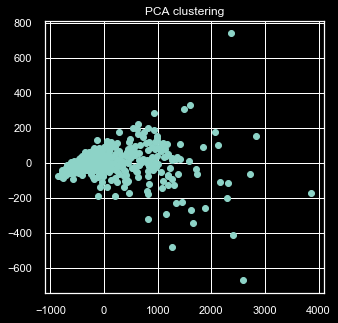

In [565]:
#PCA, principal component analysis (unsupervised used for grouping)
with plt.style.context('dark_background'):
    N=dataset.values
    pca = PCA(n_components=2)
    x = pca.fit_transform(N)
    plt.figure(figsize = (5,5))
    plt.scatter(x[:,0],x[:,1])
    plt.title("PCA clustering")
    plt.show()

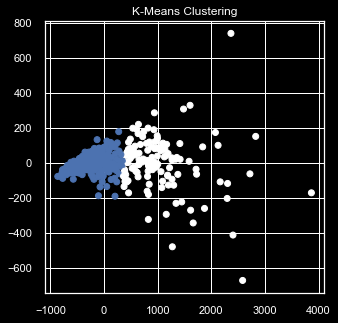

In [567]:
# k Means clustering, unsupervised
with plt.style.context('dark_background'):
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=2, random_state=5)
    X_clustered = kmeans.fit_predict(N)

    LABEL_COLOR_MAP = {0 : 'b',
                       1 : 'w'
                              }

    label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
    plt.figure(figsize = (5,5))
    plt.scatter(x[:,0],x[:,1], c= label_color)
    plt.title("K-Means Clustering")
    plt.show()

In [87]:
# Applying default Neural Network

from sklearn.neural_network import MLPClassifier

In [108]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [109]:
y_prob = mlp.predict_proba(X_test)[:,1] # positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # threshold the probabilities to give class predictions.
mlp.score(X_test, y_pred)

1.0

In [110]:
# neural network confusion matrix
nn_confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
nn_confusion_matrix

array([[71,  1],
       [ 9, 33]], dtype=int64)

In [111]:
nn_auc_roc=metrics.classification_report(y_test,y_pred)
print('AUC ROC report for Neural Network model: \n', nn_auc_roc)

AUC ROC report for Neural Network model: 
               precision    recall  f1-score   support

           0       0.89      0.99      0.93        72
           1       0.97      0.79      0.87        42

    accuracy                           0.91       114
   macro avg       0.93      0.89      0.90       114
weighted avg       0.92      0.91      0.91       114



In [112]:
nn_auc_roc=metrics.roc_auc_score(y_test,y_pred)*100
print('AUC ROC score for Neural Network: {:.2f}%'.format(nn_auc_roc))
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
nn_roc_auc = auc(false_positive_rate, true_positive_rate)*100
print('ROC AUC score for Neural Network: {:.2f}%'.format(nn_roc_auc))

AUC ROC score for Neural Network: 88.59%
ROC AUC score for Neural Network: 98.71%


Text(0.5, 0, 'False Positive Rate')

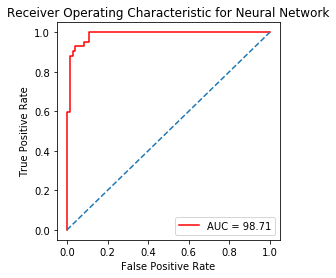

In [113]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.title('Receiver Operating Characteristic for Neural Network')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % nn_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')